In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-dataset/stores data-set.csv
/kaggle/input/retail-dataset/Features data set.csv
/kaggle/input/retail-dataset/sales data-set.csv
/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv


**Store data description .
> To be done by Tiwari N.**

In [2]:
#Features data
store_df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
store_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
store_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
store_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

**Actual Analysis starts
> To be done by Adarsh K.**

In [7]:
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

Text(0, 0.5, 'Sales')

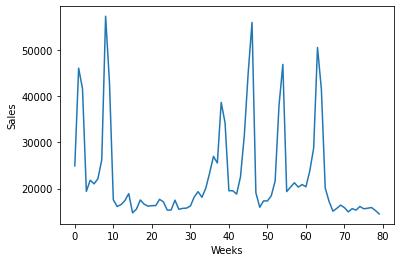

In [9]:
import matplotlib.pyplot as plt
plt.plot(df['Weekly_Sales'][:80])
plt.xlabel('Weeks')
plt.ylabel('Sales')

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
total_sale_by_months_overall = df.groupby(df['Date'].dt.strftime('%B'))['Weekly_Sales'].sum().sort_values()

<Figure size 7200x7200 with 0 Axes>

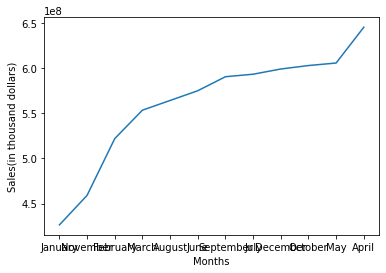

<Figure size 7200x7200 with 0 Axes>

In [12]:
plt.plot(total_sale_by_months_overall)
plt.xlabel("Months")
plt.ylabel("Sales(in thousand dollars)")
plt.figure(figsize=(100,100))

In [13]:
df.head(10) # Store data general headings , showing Weekly Salesa and Holidays.

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
5,1,1,2010-12-03,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-02-04,57258.43,False
9,1,1,2010-09-04,42960.91,False


In [14]:
df_sales_in_holiday_week = df[['Weekly_Sales','IsHoliday']] #Creating Data to analyse impact of holiday on sales.

In [15]:
df_sales_in_holiday_week #Total 4 lakh rows of data to analyse for holiday.

,Weekly_Sales,IsHoliday
0,24924.50,False
1,46039.49,True
2,41595.55,False
3,19403.54,False
4,21827.90,False
...,...,...
421565,508.37,False
421566,628.10,False
421567,1061.02,False
421568,760.01,False


In [16]:
df_sales_in_holiday_week = df_sales_in_holiday_week[df_sales_in_holiday_week['IsHoliday']==True] #Selecting Holidays days from all the records.

In [17]:
df_sales_in_holiday_week

,Weekly_Sales,IsHoliday
1,46039.49,True
31,18194.74,True
42,18820.29,True
47,19124.58,True
53,37887.17,True
...,...,...
421510,1092.66,True
421521,794.62,True
421526,553.21,True
421532,770.86,True


Text(0.5, 0, 'Indices')

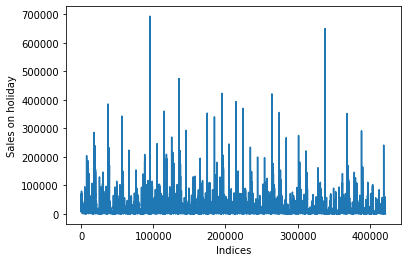

In [18]:
plt.plot(df_sales_in_holiday_week[['Weekly_Sales']])
plt.ylabel('Sales on holiday')                       #Time series data for sales on holidays only.
plt.xlabel('Indices')

In [19]:
df_sales_in_holiday_week[['Weekly_Sales']].max()  #maximum sale on a holidays

Weekly_Sales    693099.36
dtype: float64

In [20]:
abs(df_sales_in_holiday_week[['Weekly_Sales']].min()) #minimum sale on a holidays

Weekly_Sales    798.0
dtype: float64

In [21]:
df_sales_in_holiday_week[['Weekly_Sales']].mean() #average sale on holidays

Weekly_Sales    17035.823187
dtype: float64

**Stores data analysis ahead...
**

In [22]:
df_store_data = pd.read_csv('/kaggle/input/retaildataset/stores data-set.csv')

In [23]:
df_store_data.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [24]:
store_1_sales_df = df[df['Store'] == 1]['Weekly_Sales'] #Store 1 sales data

Text(0, 0.5, 'Sales in Dollars')

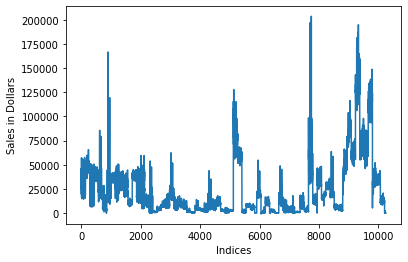

In [25]:
plt.plot(store_1_sales_df) 
plt.xlabel('Indices')
plt.ylabel('Sales in Dollars')    #Time series data for sale in dept no 1. Similar inferentials could be drawn for remaining s
                                    #stores ,how their sales look like , when its at peak ,w

Features data Analysis

In [26]:
df_features = pd.read_csv('/kaggle/input/retaildataset/Features data set.csv')

In [27]:
df_features  #Tally of features data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


**Types of stores from features data
**
Market cover of particuar type of store


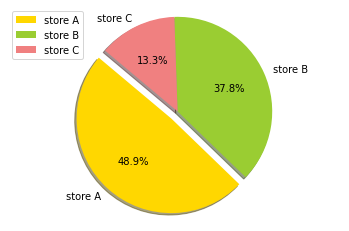

In [28]:
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice                               

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

Store data analysis.

In [29]:
df_store = pd.read_csv('/kaggle/input/retaildataset/stores data-set.csv')

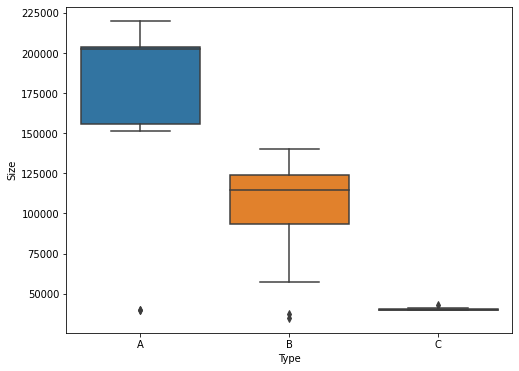

In [30]:
import seaborn as sns
store_type = pd.concat([df_store['Type'], df_store['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

1. There are 45 stores in total.
2. There are a total of 3 types of stores: Type A, B, and C.
3. By boxplot and piechart, we can say that type A store is the largest store and C is the smallest

In [31]:
df_store.head(5)                #Types of store and size

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [32]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [33]:
total_sale_by_stores_overall = df.groupby(df['Store'])['Weekly_Sales'].sum().sort_values()  #Total sale by all stores

In [34]:
total_sale_by_stores_overall  #Store number and their sales of overall tenure

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Store frequency')

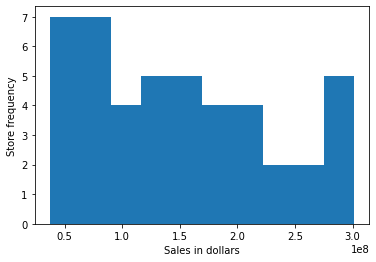

In [35]:
import numpy as np
y = np.arange(1,46,1)                       #Explains how stores are performing on basis of frequency.
plt.hist(total_sale_by_stores_overall)
plt.xlabel("Sales in dollars")
plt.ylabel("Store frequency")

In [36]:
df_store_and_sales = pd.DataFrame({'Store_no':[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],'Sales':total_sale_by_stores_overall})

Text(0, 0.5, 'Sales')

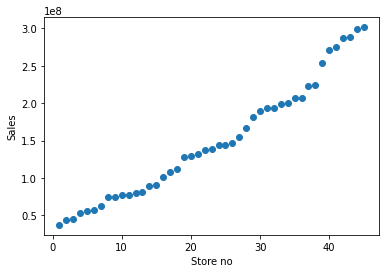

In [37]:
plt.scatter(df_store_and_sales['Store_no'],df_store_and_sales['Sales'])   #Plot showing as size of store grows ,sale also grows.
plt.xlabel('Store no')
plt.ylabel('Sales')                          #Store number given according to size of store.

In [38]:
total_sale_by_dept_overall = df.groupby(df['Dept'])['Weekly_Sales'].sum().sort_values() #Department wise sales

In [39]:
total_sale_by_dept_overall_df = pd.DataFrame({'Store':total_sale_by_dept_overall.index, 'list':total_sale_by_dept_overall.values})

Text(0, 0.5, 'Sales by department')

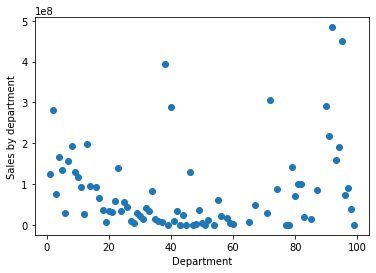

In [40]:
plt.scatter(total_sale_by_dept_overall_df['Store'],total_sale_by_dept_overall_df['list'])
plt.xlabel('Department')
plt.ylabel('Sales by department')           #Department wise sales of overall tenure
                                            #We can see dept 20 - 60 dont sell above 10000 dollars

In [41]:
df_features['Date'] = pd.to_datetime(df_features['Date'])

In [42]:
df_merged_store_data_and_features = pd.merge(df,df_features,on='Date')

In [43]:
df_merged_store_data_and_features.drop_duplicates('Date',inplace=True)

In [44]:
print('Correlation between Weekly Sales and IsHoliday:',df_merged_store_data_and_features['Weekly_Sales'].corr(df_merged_store_data_and_features['IsHoliday_x']))

Correlation between Weekly Sales and IsHoliday: 0.09006090476542446


Text(0, 0.5, 'Holiday(Y/N)')

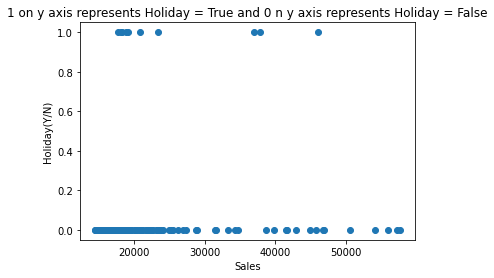

In [45]:
plt.scatter(df_merged_store_data_and_features['Weekly_Sales'],df_merged_store_data_and_features['IsHoliday_x'])
plt.title('1 on y axis represents Holiday = True and 0 n y axis represents Holiday = False')
plt.xlabel('Sales')
plt.ylabel('Holiday(Y/N)')                           #Plot showing sales on / not on holidays => on holidays sales goes up to
                                                    #700000 dollars

Shows almost no correlation between Sales and Customer Price Index (-ve correlation) [one increase other decreases]

In [46]:
print('Correlation between Weekly Sales and CPI:',df_merged_store_data_and_features['Weekly_Sales'].corr(df_merged_store_data_and_features['CPI']))

Correlation between Weekly Sales and CPI: -0.0435326936506556


Text(0, 0.5, 'CPI')

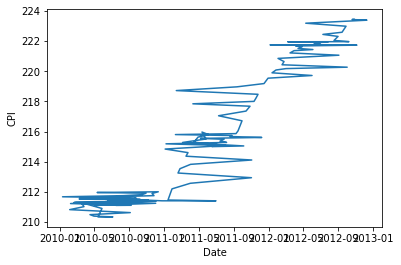

In [47]:
plt.rcParams['agg.path.chunksize'] = 100
plt.plot(df_merged_store_data_and_features['Date'],df_merged_store_data_and_features['CPI'])
plt.xlabel('Date')
plt.ylabel('CPI')                      #Analysis shows CPI has gone up, but less correlation

In [48]:
df_merged_store_data_and_features

,Store_x,Dept,Date,Weekly_Sales,IsHoliday_x,Store_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-05-02,24924.50,False,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
132975,1,1,2010-12-02,46039.49,True,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
265995,1,1,2010-02-19,41595.55,False,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
399960,1,1,2010-02-26,19403.54,False,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
532755,1,1,2010-05-03,21827.90,False,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302985,1,1,2012-09-28,18947.81,False,1,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,False
18436275,1,1,2012-05-10,21904.47,False,1,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,False
18570195,1,1,2012-12-10,22764.01,False,1,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False
18704745,1,1,2012-10-19,24185.27,False,1,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,False


Correlation between Sales and Unemployment. [Positive Correlation approx 0.11, although weak] [increse in one increase other]

In [49]:
print('Correlation between Weekly Sales and Unemployment:',df_merged_store_data_and_features['Weekly_Sales'].corr(df_merged_store_data_and_features['Unemployment']))

Correlation between Weekly Sales and Unemployment: 0.10339925513962817


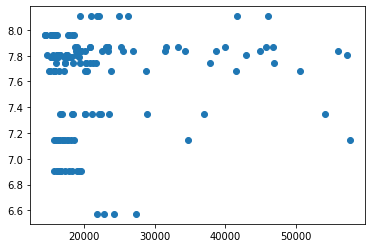

In [50]:
plt.scatter(df_merged_store_data_and_features['Weekly_Sales'],df_merged_store_data_and_features['Unemployment'])

In [51]:
print('Correlation between Weekly Sales and Unemployment:',df_merged_store_data_and_features['Weekly_Sales'].corr(df_merged_store_data_and_features['Fuel_Price']))

Correlation between Weekly Sales and Unemployment: -0.06639580050759054


In [52]:
df_of_sale_and_markdowns = df_merged_store_data_and_features[['Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']]

In [53]:
df_of_sale_and_markdowns

,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
0,2010-05-02,NaN,NaN,NaN,NaN,NaN,24924.50
132975,2010-12-02,NaN,NaN,NaN,NaN,NaN,46039.49
265995,2010-02-19,NaN,NaN,NaN,NaN,NaN,41595.55
399960,2010-02-26,NaN,NaN,NaN,NaN,NaN,19403.54
532755,2010-05-03,NaN,NaN,NaN,NaN,NaN,21827.90
...,...,...,...,...,...,...,...
18302985,2012-09-28,3666.27,7.64,1.65,1417.96,4744.28,18947.81
18436275,2012-05-10,8077.89,NaN,18.22,3617.43,3626.14,21904.47
18570195,2012-12-10,2086.18,NaN,8.11,602.36,5926.45,22764.01
18704745,2012-10-19,950.33,NaN,4.93,80.25,2312.85,24185.27


In [54]:
df_formatted = df_of_sale_and_markdowns.fillna(df_of_sale_and_markdowns['MarkDown1'].mean(skipna=True))

In [55]:
df_formatted.index = np.arange(143)

In [56]:
df_formatted

,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
0,2010-05-02,8090.766275,8090.766275,8090.766275,8090.766275,8090.766275,24924.50
1,2010-12-02,8090.766275,8090.766275,8090.766275,8090.766275,8090.766275,46039.49
2,2010-02-19,8090.766275,8090.766275,8090.766275,8090.766275,8090.766275,41595.55
3,2010-02-26,8090.766275,8090.766275,8090.766275,8090.766275,8090.766275,19403.54
4,2010-05-03,8090.766275,8090.766275,8090.766275,8090.766275,8090.766275,21827.90
...,...,...,...,...,...,...,...
138,2012-09-28,3666.270000,7.640000,1.650000,1417.960000,4744.280000,18947.81
139,2012-05-10,8077.890000,8090.766275,18.220000,3617.430000,3626.140000,21904.47
140,2012-12-10,2086.180000,8090.766275,8.110000,602.360000,5926.450000,22764.01
141,2012-10-19,950.330000,8090.766275,4.930000,80.250000,2312.850000,24185.27


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


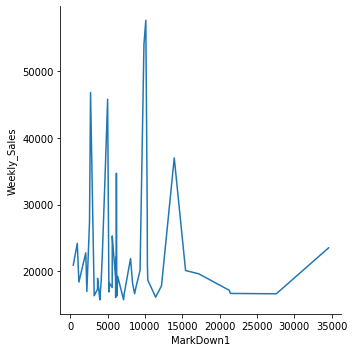

In [57]:
sns.relplot(df_of_sale_and_markdowns['MarkDown1'],df_of_sale_and_markdowns['Weekly_Sales'],kind='line')

Shows that due to markdow1 ,sale goes up , but in range 410 - 34577

In [58]:
df_of_sale_and_markdowns['MarkDown1'].min(),df_of_sale_and_markdowns['MarkDown1'].max()

(410.31, 34577.06)

In [59]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


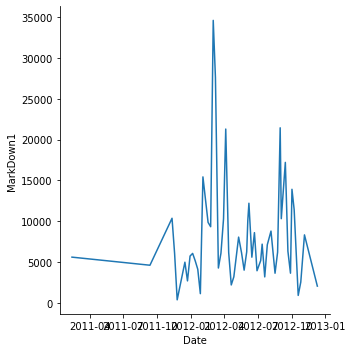

In [60]:
sns.relplot(df_of_sale_and_markdowns['Date'],df_of_sale_and_markdowns['MarkDown1'],kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


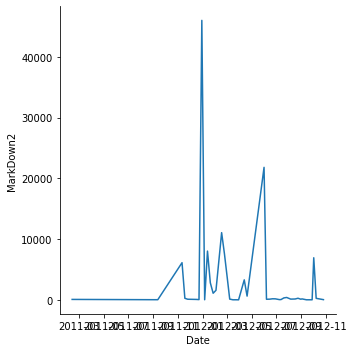

In [61]:
sns.relplot(df_of_sale_and_markdowns['Date'],df_of_sale_and_markdowns['MarkDown2'],kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


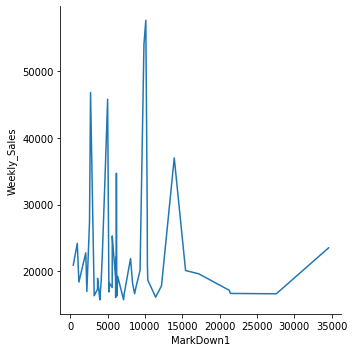

In [62]:
sns.relplot(df_of_sale_and_markdowns['MarkDown1'],df_of_sale_and_markdowns['Weekly_Sales'],kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


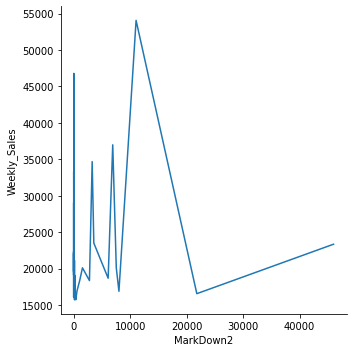

In [63]:
sns.relplot(df_of_sale_and_markdowns['MarkDown2'],df_of_sale_and_markdowns['Weekly_Sales'],kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


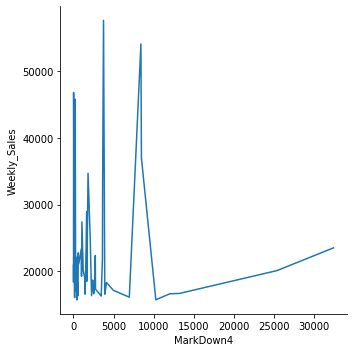

In [64]:
sns.relplot(df_of_sale_and_markdowns['MarkDown4'],df_of_sale_and_markdowns['Weekly_Sales'],kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


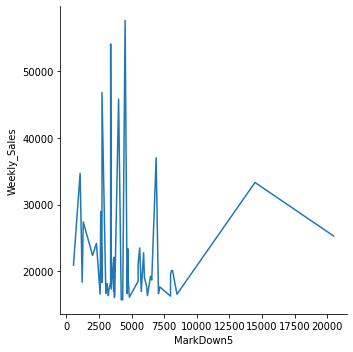

In [65]:
sns.relplot(df_of_sale_and_markdowns['MarkDown5'],df_of_sale_and_markdowns['Weekly_Sales'],kind='line')